<h3>Public Concerns About Balancing Online Safety and Free Expression
</h3>

<h4>Main Concerns About the Online Safety Act’s Impact on Freedom of Expression
</h4>

In [10]:
# To plot pretty figures
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "data_viz_group"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution, bbox_inches="tight")

<h3>What is your main concern about how the online safety act could affect freedom of expression online?</h3>

Saving figure Q2.1_bar


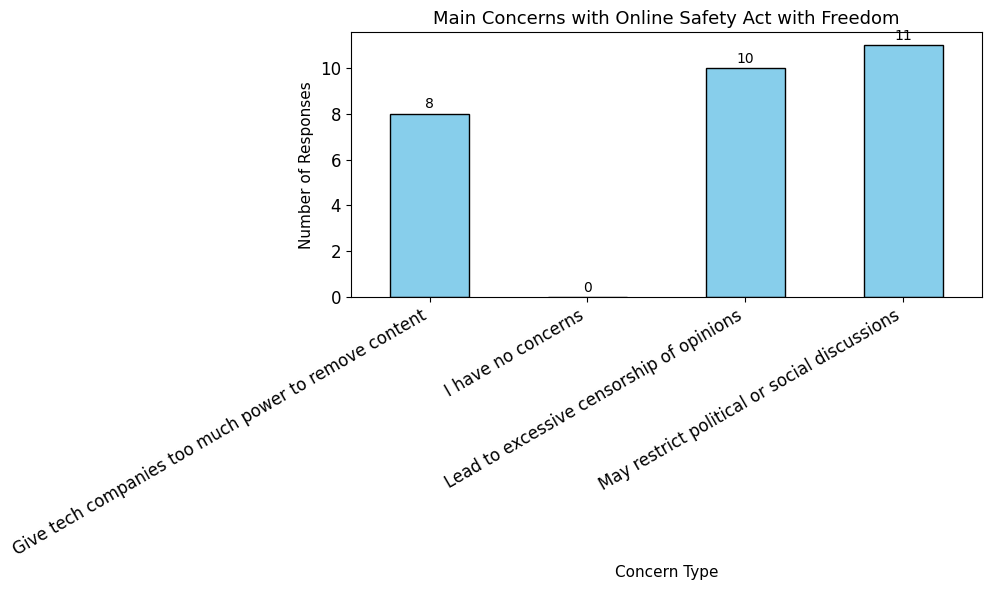

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import difflib

df = pd.read_csv("data.csv")

target = "Main Concerns About the Online Safety Act’s Impact on Freedom of Expression"

# Find the closest matching column in the CSV
actual_column = difflib.get_close_matches(target, df.columns.tolist(), n=1)
if not actual_column:
    raise KeyError("Could not find a column")

column_name = actual_column[0]

# Load the column, replacing NaN with the text
concerns = df[column_name].fillna("I have no concerns")

# Split multiple selections and count values
concerns_split = concerns.str.split(", ").explode().value_counts()

# Ensure the "I have no concerns" option always exists
concerns_split = concerns_split.reindex(
    concerns_split.index.tolist() + ["I have no concerns"],
    fill_value=0
)

# Sort alphabetically
concerns_split = concerns_split.sort_index()

# Plot
plt.figure(figsize=(10,6))
bars = concerns_split.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Main Concerns with Online Safety Act with Freedom", fontsize=13)
plt.xlabel("Concern Type", fontsize=11)
plt.ylabel("Number of Responses", fontsize=11)
plt.xticks(rotation=30, ha='right')

# Add value labels
for i, value in enumerate(concerns_split):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)

save_fig("Q2.1_bar")
plt.tight_layout()
plt.show()


<h3>Does the Online Safety Act protect users from harm without unfairly limiting freedom of expressions?</h3>

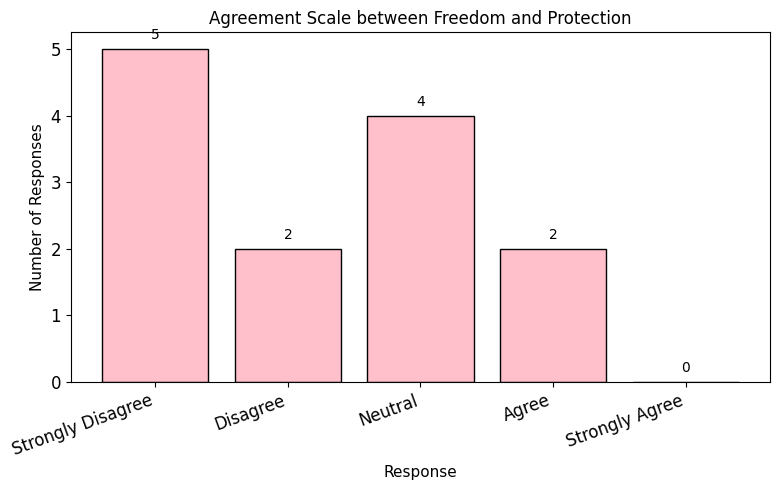

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data.csv")

column = "Does the Online Safety Act protect users from harm without unfairly limiting freedom of expressions?"

responses = df[column].value_counts().sort_index()

for i in range(1, 6):
    if i not in responses.index:
        responses[i] = 0

responses = responses.sort_index()

labels = {
    1: "Strongly Disagree",
    2: "Disagree",
    3: "Neutral",
    4: "Agree",
    5: "Strongly Agree"
}

plt.figure(figsize=(8,5))
bars = plt.bar(responses.index, responses.values, color="pink", edgecolor="black")

plt.title("Agreement Scale between Freedom and Protection", fontsize=12)
plt.xlabel("Response", fontsize=11)
plt.ylabel("Number of Responses", fontsize=11)
plt.xticks(list(labels.keys()), list(labels.values()), rotation=20, ha="right")

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             int(bar.get_height()), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


<h3>What should be prioritized more under the online safety act?</h3>

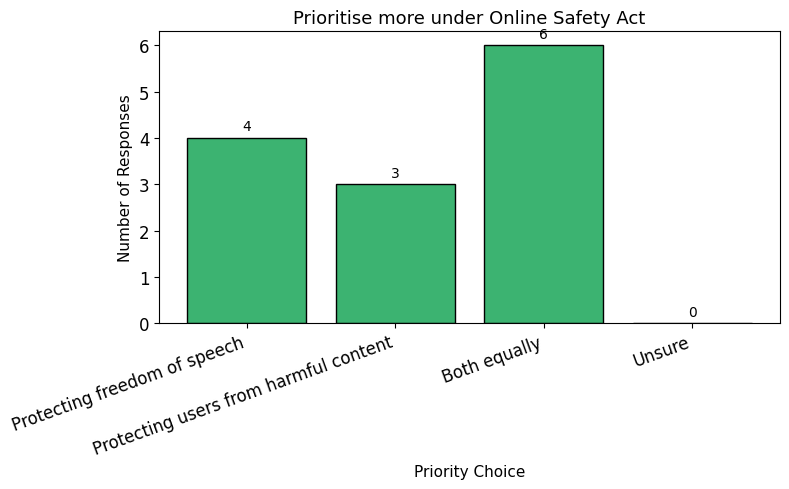

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data.csv")

column = "What should be prioritized more under the online safety act?"

priorities = df[column].value_counts()

expected_options = [
    "Protecting freedom of speech",
    "Protecting users from harmful content",
    "Both equally",
    "Unsure"
]

for option in expected_options:
    if option not in priorities.index:
        priorities[option] = 0

priorities = priorities.reindex(expected_options)


plt.figure(figsize=(8,5))
bars = plt.bar(priorities.index, priorities.values, color="mediumseagreen", edgecolor="black")


plt.title("Prioritise more under Online Safety Act", fontsize=13)
plt.xlabel("Priority Choice", fontsize=11)
plt.ylabel("Number of Responses", fontsize=11)
plt.xticks(rotation=20, ha='right')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
             int(bar.get_height()), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


<h3>Relationship between those who disagree with the online safety act and what should be prioritied more</h3>

<h3>Relationship Between Perceived Protection and Public Priority Under the online safety act</h3>

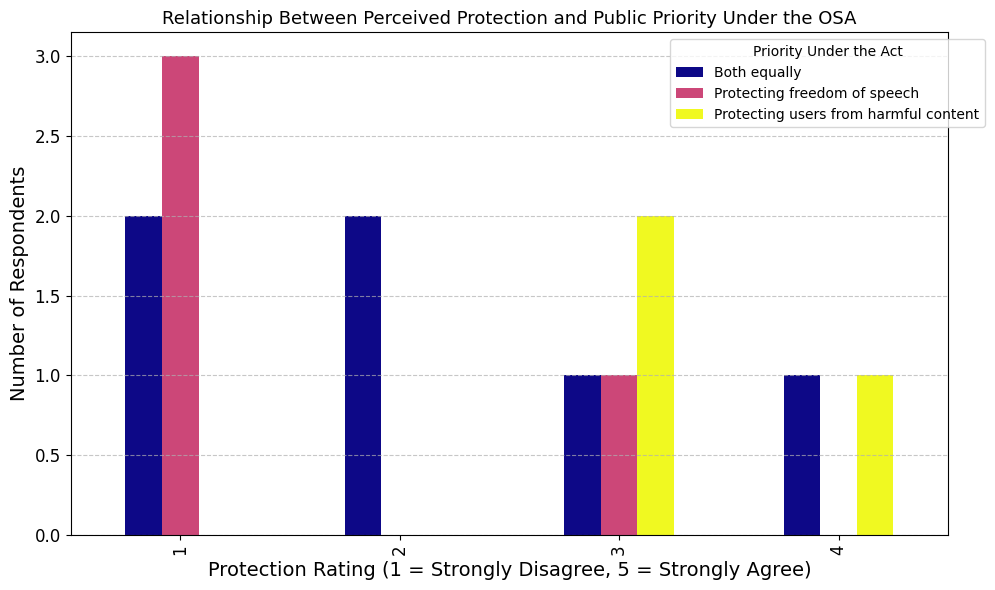

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "data.csv"  # change if needed
df = pd.read_csv(file_path)

# define relevant columns
protection_col = 'Does the Online Safety Act protect users from harm without unfairly limiting freedom of expressions?'
priority_col = 'What should be prioritized more under the online safety act?'

# create a cross-tabulation (counts)
bivariate_data = pd.crosstab(df[protection_col], df[priority_col])

# Plot grouped bar chart
bivariate_data.plot(kind='bar', figsize=(10, 6), colormap='plasma')
plt.title("Relationship Between Perceived Protection and Public Priority Under the OSA", fontsize=13)
plt.xlabel("Protection Rating (1 = Strongly Disagree, 5 = Strongly Agree)")
plt.ylabel("Number of Respondents")
plt.legend(title="Priority Under the Act", bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<h3>Relationship beween those who agreed versus disagreed and how that affected their choice of main concern</h3>

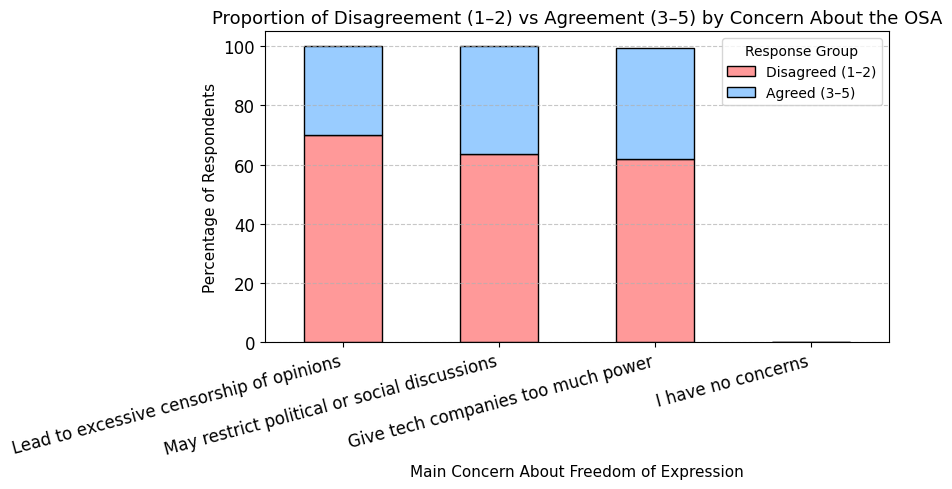

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Main Concern': [
        'Lead to excessive censorship of opinions',
        'May restrict political or social discussions',
        'Give tech companies too much power',
        'I have no concerns'
    ],
    'Disagreed (1–2)': [70, 63.6, 62, 0],
    'Agreed (3–5)': [30, 36.4, 37.5, 0]
}

df = pd.DataFrame(data)

df.set_index('Main Concern', inplace=True)

df.plot(kind='bar', stacked=True, figsize=(9, 5), color=['#ff9999', '#99ccff'], edgecolor='black')

plt.title("Proportion of Disagreement (1–2) vs Agreement (3–5) by Concern About the OSA", fontsize=13)
plt.xlabel("Main Concern About Freedom of Expression", fontsize=11)
plt.ylabel("Percentage of Respondents", fontsize=11)
plt.legend(title="Response Group")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()